In [1]:
import nltk
import numpy as np
from nltk.metrics import *
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from pattern.en import tag
nltk.download('wordnet')
from difflib import SequenceMatcher

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\balaj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### Compare your given name with your nickname (if you don’t have a nickname, invent one for this assignment) by answering the following questions:
- a.	What is the edit distance between your nickname and your given name?
- b.	What is the percentage string match between your nickname and your given name?

Show your work for both calculations.

<B>Edit Disance</B>: Function edit_distance from NLTK used to calculate the edit distance between my given name and my nick name. The edit distance is the number of characters that need to be substituted, inserted, or deleted, to transform my given name into my nick name.

<B>SequenceMatcher</B> is used to find the percentage string match between my given name and my nick name. It finds the length of the longest subsequence present in both given name and nick name.

In [2]:
givenName = 'Balaji'
nickName = 'Balu'

# edit distance
editDist = edit_distance(givenName,nickName)

print ('The edit distance from {} (given name) to {} (nick name) is {}\n'.
       format(givenName,nickName,editDist))


The edit distance from Balaji (given name) to Balu (nick name) is 3



In [3]:
# percentage string match
pctDist = (SequenceMatcher(None, givenName, nickName).ratio())*100

print ('My given name "{}" and nickname "{}" are {:2.2f}% similar\n'.
      format(givenName, nickName,pctDist))

My given name "Balaji" and nickname "Balu" are 60.00% similar



#### Find a friend (or family member or classmate) who you know has read a certain book. Without your friend knowing, copy the first two sentences of that book. Now rewrite the words from those sentences, excluding stop words. Now tell your friend to guess which book the words are from by reading them just that list of words. Did you friend correctly guess the book on the first try? What did he or she guess? Explain why you think you friend either was or was not able to guess the book from hearing the list of words. 

In [22]:
# First two lines from "Harry Potter and the Sorcerer's Stone"

twoSentences = "Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, \
thank you very much. They were the last people you'd expect to be involved in anything strange or mysterious, \
because they just didn't hold with such nonsense."

# stop words in English
stopWords = set(stopwords.words('english'))   
# tokens 
wordTokens = nltk.word_tokenize(twoSentences)   
cleanSentence = [w for w in wordTokens if not w in stopWords] 
    
print("Original Sentense:\n", twoSentences) 
print("\nSentense after removing the stop words:\n", cleanSentence)

Original Sentense:
 Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you'd expect to be involved in anything strange or mysterious, because they just didn't hold with such nonsense.

Sentense after removing the stop words:
 ['Mr.', 'Mrs.', 'Dursley', ',', 'number', 'four', ',', 'Privet', 'Drive', ',', 'proud', 'say', 'perfectly', 'normal', ',', 'thank', 'much', '.', 'They', 'last', 'people', "'d", 'expect', 'involved', 'anything', 'strange', 'mysterious', ',', "n't", 'hold', 'nonsense', '.']


My daughter loves Harry Potter so she easily recognized the opening lines from "Harry Potter and the Sorcerer's Stone". Removing the stop words did not remove the words that uniquely identify this text, the main idea of the sentences remains intact

#### Run one of the stemmers available in Python. Run the same two sentences from question 2 above through the stemmer and show the results. How many of the outputted stems are valid morphological roots of the corresponding words? Express this answer as a percentage.

In [23]:
ps = nltk.stem.PorterStemmer()
ws = nltk.wordnet.WordNetLemmatizer()

psWords = []
wsWords = []
#
# Create a list of stemmed words
#
for w in wordTokens:
    psWords.append(ps.stem(w))
    wsWords.append(ws.lemmatize(w))
#
# Visually examine each stemmer to see how many are not morphological roots
#
print('            Stemmer Table')
print('------------------------------------------')
print(' {:13} {:13} {:13}'.format('Tokens','WordNet','Porter'))
print('------------------------------------------')
for i in range(len(rsWords)):
    print(' {:13} {:13} {:13}'.format(wordTokens[i],wsWords[i], psWords[i]))

            Stemmer Table
------------------------------------------
 Tokens        WordNet       Porter       
------------------------------------------
 Mr.           Mr.           mr.          
 and           and           and          
 Mrs.          Mrs.          mrs.         
 Dursley       Dursley       dursley      
 ,             ,             ,            
 of            of            of           
 number        number        number       
 four          four          four         
 ,             ,             ,            
 Privet        Privet        privet       
 Drive         Drive         drive        
 ,             ,             ,            
 were          were          were         
 proud         proud         proud        
 to            to            to           
 say           say           say          
 that          that          that         
 they          they          they         
 were          were          were         
 perfectly     perfectly    

From the table above we can see that there are no issues with any word with WordNet and about 3 words don't look like they are stemmed as well as they could be with Porter stemmer

The bar chart below gives a visual represneation of how the Wordnet and Porter stemmers performed.

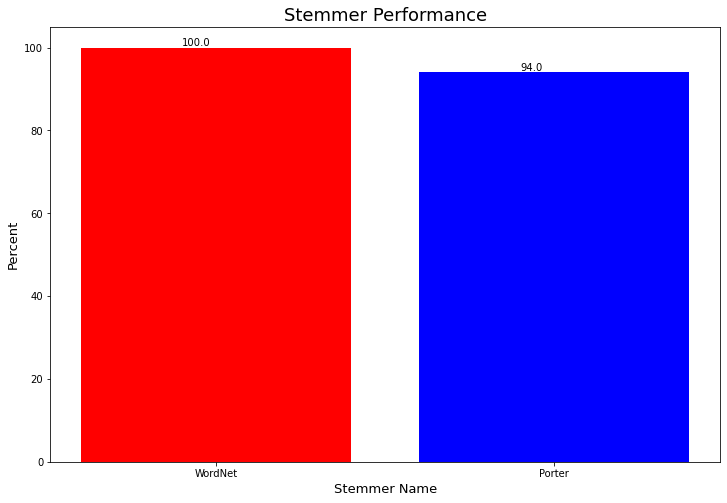

In [25]:
wordWrong = 0
portWrong = 3

wordPerct = round(1-(wordWrong/len(wsWords)),2)*100
portPerct = round(1-(portWrong/len(psWords)),2)*100

stemPercList = [wordPerct, portPerct]
stemmers = ['WordNet', 'Porter']
colors =['r','b']
plt.figure(figsize=(12,8))
plt.bar(stemmers, height=stemPercList, color=colors)
plt.title('Stemmer Performance',fontsize=18)
plt.xlabel('Stemmer Name', fontsize=13)
plt.ylabel('Percent', fontsize=13)
for i, v in enumerate(stemPercList):
    plt.text(i-.1 , v+.5, str(v), color='black')
plt.show()